In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error, mean_absolute_error, confusion_matrix
)
import joblib
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

In [2]:
dataset = pd.read_csv(r"C:\Users\meghr\OneDrive\Desktop\HeartAttack Project\Heart Attack.csv")
dataset

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [3]:
dataset.shape

(1319, 9)

In [4]:
dataset.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [6]:
dataset['class'].value_counts()

class
positive    810
negative    509
Name: count, dtype: int64

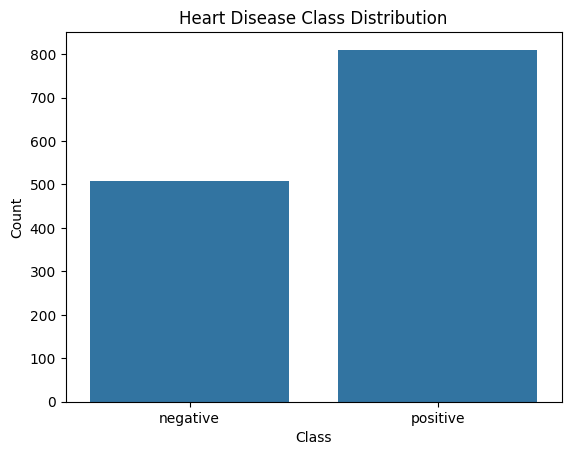

class
positive    61.410159
negative    38.589841
Name: proportion, dtype: float64


In [7]:
sns.countplot(x='class',data=dataset)
plt.title('Heart Disease Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
print(dataset['class'].value_counts(normalize=True)*100)

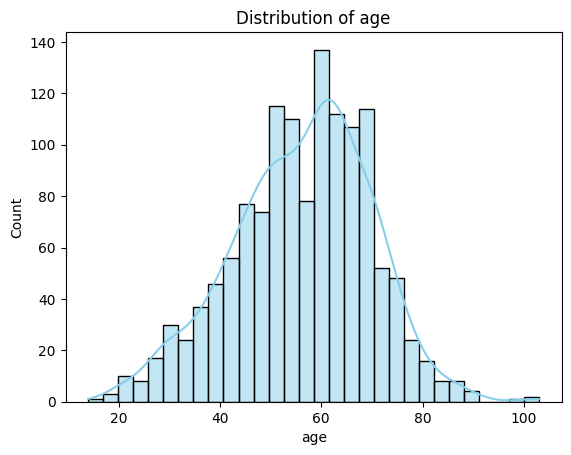

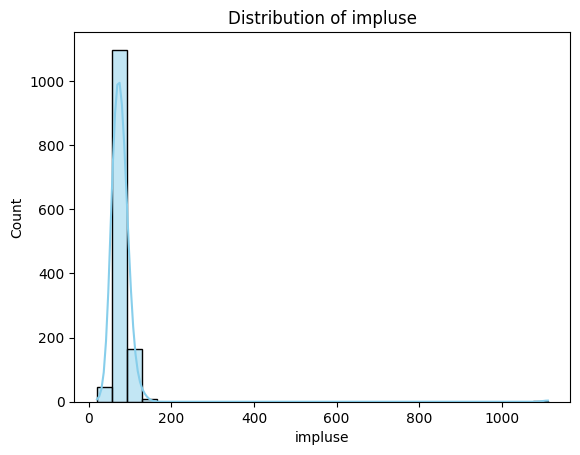

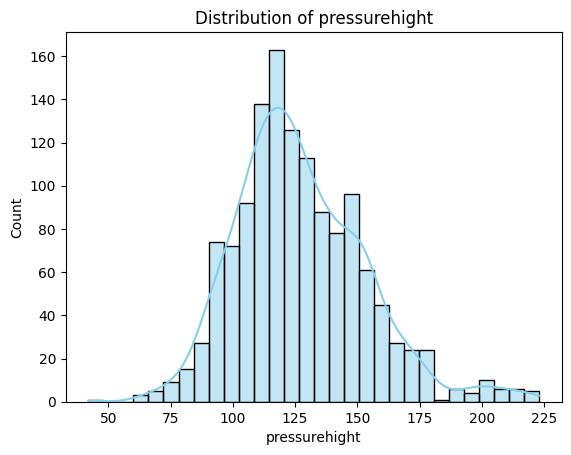

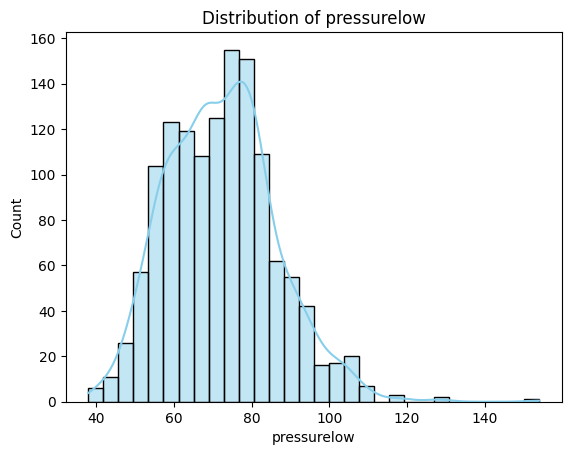

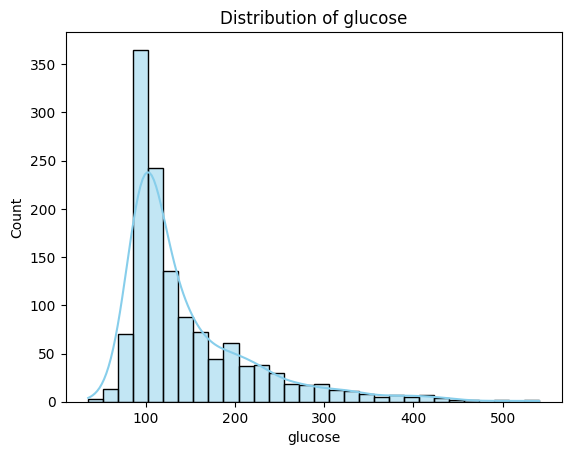

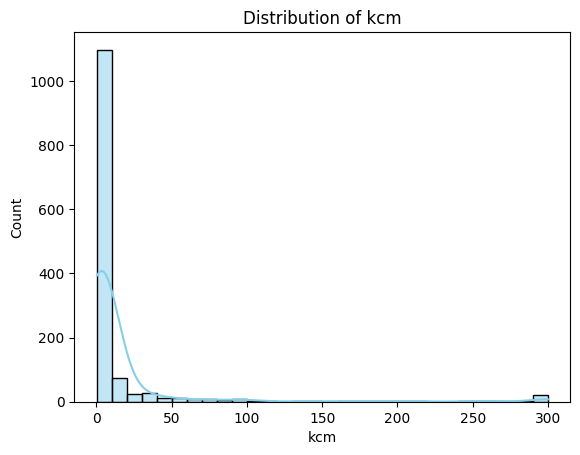

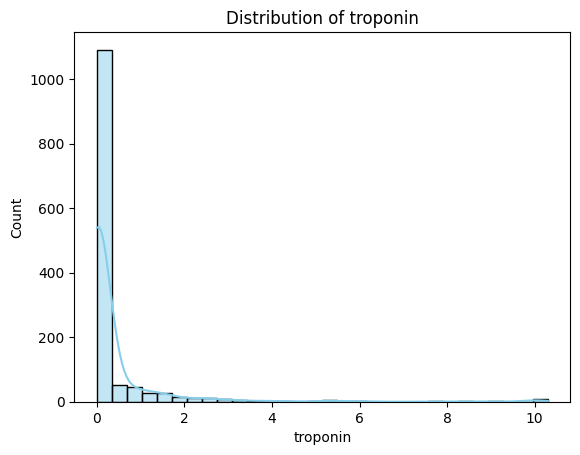

In [8]:
columns = ['age', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']

for col in columns:
    sns.histplot(dataset[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [9]:
# Cap impluse between 40 and 180
dataset['impluse_clean'] = dataset['impluse'].clip(lower=40, upper=180)

# Cap glucose at a reasonable upper limit
dataset['glucose_capped'] = dataset['glucose'].clip(upper=300)


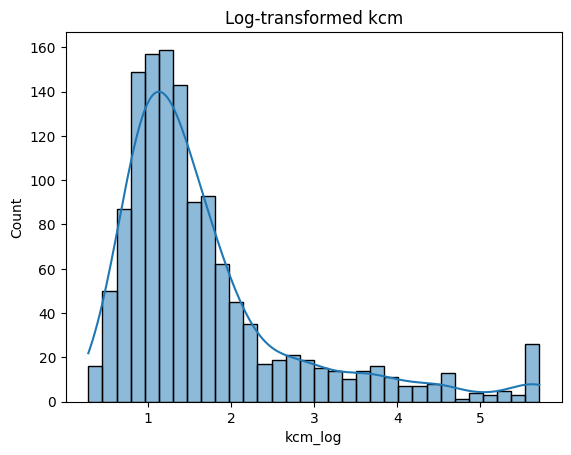

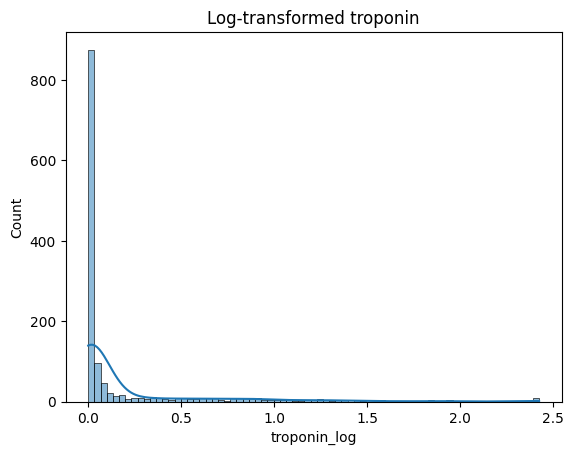

In [10]:
import numpy as np

dataset['kcm_log'] = np.log1p(dataset['kcm'])
dataset['troponin_log'] = np.log1p(dataset['troponin'])
sns.histplot(dataset['kcm_log'], kde=True); plt.title("Log-transformed kcm"); plt.show()
sns.histplot(dataset['troponin_log'], kde=True); plt.title("Log-transformed troponin"); plt.show()

C:\Users\meghr\AppData\Local\Temp\ipykernel_11916\256249384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=dataset, palette='Set3')


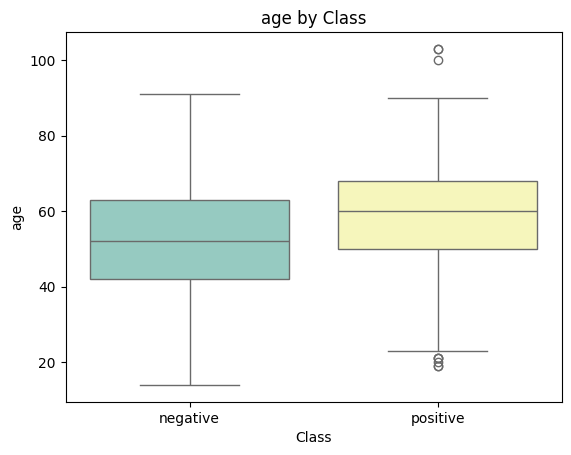

C:\Users\meghr\AppData\Local\Temp\ipykernel_11916\256249384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=dataset, palette='Set3')


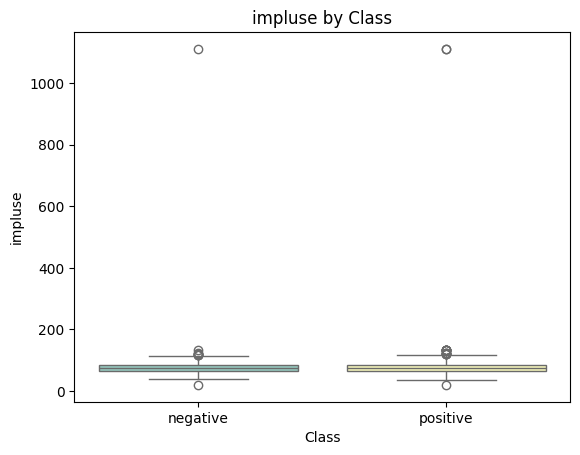

C:\Users\meghr\AppData\Local\Temp\ipykernel_11916\256249384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=dataset, palette='Set3')


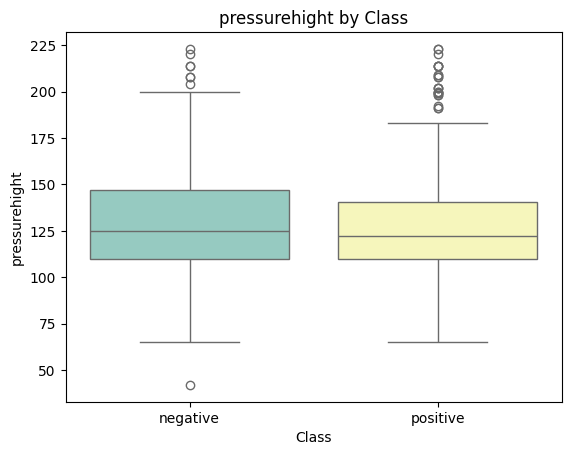

C:\Users\meghr\AppData\Local\Temp\ipykernel_11916\256249384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=dataset, palette='Set3')


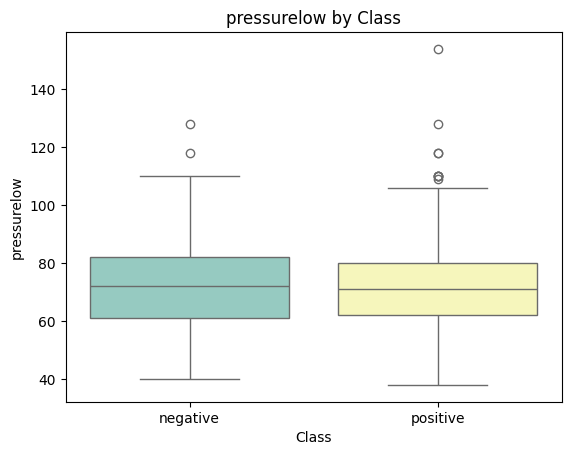

C:\Users\meghr\AppData\Local\Temp\ipykernel_11916\256249384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=dataset, palette='Set3')


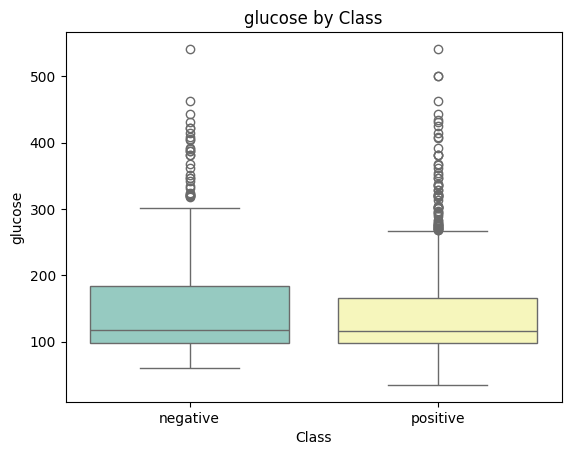

C:\Users\meghr\AppData\Local\Temp\ipykernel_11916\256249384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=dataset, palette='Set3')


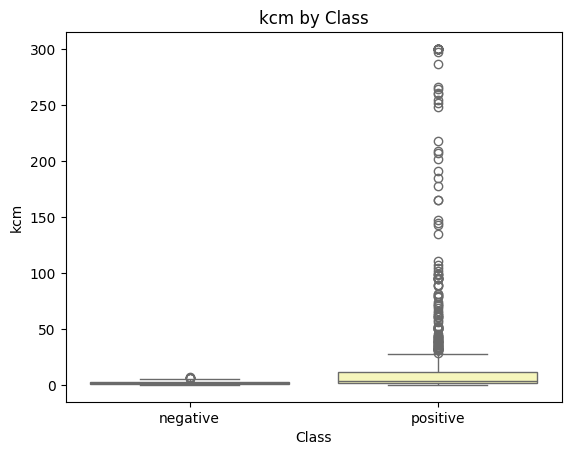

C:\Users\meghr\AppData\Local\Temp\ipykernel_11916\256249384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=dataset, palette='Set3')


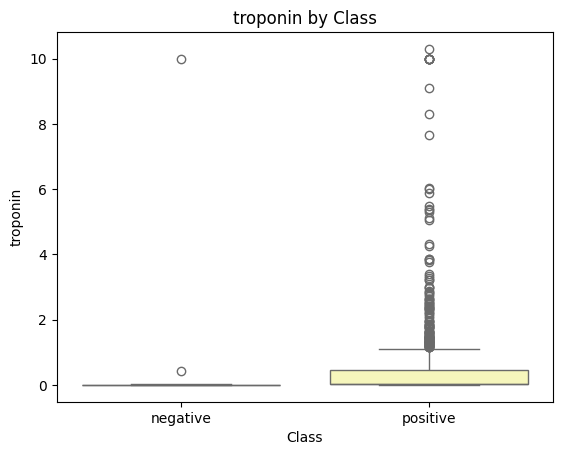

In [11]:
columns = ['age', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']
for col in columns:
    sns.boxplot(x='class', y=col, data=dataset, palette='Set3')
    plt.title(f'{col} by Class')
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.show()

In [12]:
dataset.drop(['impluse', 'glucose', 'kcm', 'troponin'], axis=1, inplace=True)


In [13]:
dataset.head()

,age,gender,pressurehight,pressurelow,class,impluse_clean,glucose_capped,kcm_log,troponin_log
0,64,1,160,83,negative,66,160.0,1.029619,0.011929
1,21,1,98,46,positive,94,296.0,2.047693,0.722706
2,55,1,160,77,negative,64,270.0,1.095273,0.002996
3,64,1,120,55,positive,70,270.0,2.699346,0.115113
4,55,1,112,65,negative,64,300.0,0.732368,0.002996


In [14]:
le = LabelEncoder()
dataset['class'] = le.fit_transform(dataset['class']) # Converts to 0/1

In [15]:
dataset['class'].value_counts()

class
1    810
0    509
Name: count, dtype: int64

In [16]:
# Augment class 0 samples with very low troponin values
low_risk = dataset[(dataset["class"] == 0) & (dataset["troponin_log"] < 0.03)]
augmented = low_risk.copy()
augmented["troponin_log"] += np.random.uniform(0.005, 0.015, size=len(augmented))
dataset_augmented = pd.concat([dataset, augmented], ignore_index=True)


In [17]:
x = dataset_augmented.drop('class', axis=1)
y = dataset_augmented['class']

In [18]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [20]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:

model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=1,  # Set this >1 if class 1 is minority
    random_state=42
)


In [22]:
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)


c:\Users\meghr\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:59:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [23]:
joblib.dump(model, 'heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.918918918918919
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       204
           1       0.92      0.92      0.92       203

    accuracy                           0.92       407
   macro avg       0.92      0.92      0.92       407
weighted avg       0.92      0.92      0.92       407

Confusion Matrix:
 [[188  16]
 [ 17 186]]


In [25]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')
print(f"Mean Squared Error : {mse:.4f}")
print(f"Mean Absolute Error : {mae:.4f}")
print(f"Root Mean Squared Error : {rmse:.4f}")
print(f"Accuracy : {accuracy:.4f}" )
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score :{f1:.4f}")

Mean Squared Error : 0.0811
Mean Absolute Error : 0.0811
Root Mean Squared Error : 0.2847
Accuracy : 0.9189
Precision: 0.9189
Recall   : 0.9189
F1 Score :0.9189


In [26]:
scores = cross_val_score(model,x_train_scaled, y_train, cv=5, scoring='f1')
print("F1 scores across folds:", scores)


c:\Users\meghr\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:59:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\meghr\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:59:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\meghr\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:59:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\meghr\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:59:50] WARNING: C:\actio

F1 scores across folds: [0.90793651 0.92903226 0.9625     0.93247588 0.9382716 ]


c:\Users\meghr\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:59:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
